# $k$-means Algorithm


#### Preamble code

In [182]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
import time

# The $k$-means algorithm

$k$-means clustering aims to partition $n$ $d-$dimensional observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.
The problem is computationally difficult (NP-hard); however, there are efficient heuristic algorithms that are commonly employed and converge quickly to a local optimum. In this Notebook we'll focus on one of them in particular: the Lloyd algorithm.

The $k$-means problem can be formalized as follows. Given a set of observations $(x_1, x_2, \cdots, x_n)$, where each observation is a $d$-dimensional real vector, $k$-means clustering aims to partition the $n$ observations into $k \leq n$ sets $S = \{S_1, S_2, \cdots, S_k\}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). 
The objective is to find:

$$
\arg \min_S \sum_{i=1}^{k} \sum_{x \in S_i} || \boldsymbol{x} - \boldsymbol{\mu_i} ||^2
$$

The most common algorithm uses an iterative refinement technique. Given an initial set of $k$ centroids $\mu_1^{(1)}, \cdots, \mu_k^{(1)}$ , the algorithm proceeds by alternating between two steps: in the **assignment step**, observations are associated to the closest **centroid**, in terms of squared Euclidean distance; in the **update step** new centroids are computed based on the new points associated to each centroid. Note: $\mu_i^{(t)}$ stands for the $i$-th centroid as of the $t$-th iteration. So $\mu_1^{(1)}$ is the centroid 1 at iteration 1.

## Algorithm pseudo-code
It is important to work on a principled approach to the design of large-scale algorithms, and this starts with using good data structures and scientific libraries, such as ```numpy``` and ```scipy```. In particular, we will focus on the use of ```numpy``` arrays, which come with efficient methods for array operations. A pseudo-code for the $k$-means algorithm is specified below:

```python
def kmeans(X, k, maxiter, seed=None):
    """
    specify the number of clusters k and
    the maximum iteration to run the algorithm
    """

    # randomly choose k data points as initial centroids
    centroids = X[rand_indices]
    
    for itr in range(maxiter):
        # ---------------
        # ASSIGNMENT STEP
        # ---------------
        # compute the distance matrix between each data point and the set of centroids
        distance_matrix = # row Index = data point Index; col Index = centroid Index; value=distance
        # assign each data point to the closest centroid
        cluster_assignment = # array Index = data point Index; array value = closest centroid Index
        
        # UPDATE STEP
        # select all data points that belong to cluster i and compute
        # the mean of these data points (each feature individually)
        # this will be our new cluster centroids
        new_centroids = ...
        
        # STOP CONDITION
        # if centroids == new_centroids => stop
 
    
```

# Synthetic data generation: working in bi-dimensional spaces

Next, we use sklearn to generate some synthetic data to test our algorithm.

In [183]:
X, y = make_blobs(n_samples = 300, centers = 4,
                  random_state = 0, cluster_std = 0.6)

In [184]:
X.shape

(300, 2)

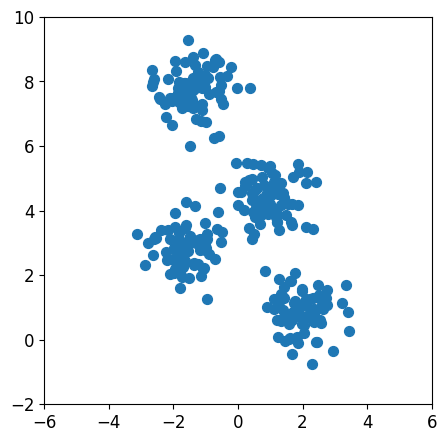

In [185]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 5, 6 
plt.rcParams['font.size'] = 12

# scatter plot
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.ylim(-2, 10)
plt.xlim(-6, 6)
plt.gca().set_aspect('equal')
plt.show()

<div class="alert alert-block alert-info">
<strong>Question 1.</strong> Implement your own version of k-means, as a serial algorithm.

Follow the guidelines below:

<ul>
    <li> Define a function to perform k-means clustering. The function should accept as inputs: the training data x, the number of clusters k, and the iteration budget you allocate to the algorithm. Additional arguments might include the use of a random seed to initialize centroids.</li>
    <li>The function should output the centroids, and the cluster assignment, that is, to which centroid each data point is assigned to</li>
    <li> Optionally, keep track of the position of the centroids, for each iteration.</li>
</ul>

<br>
Once the ```kmeans``` function is defined, you can generate input data according to the cell above, that uses scikitlearn.
<br>

The output of your cell should contain the following information:
<ul>
    <li> Print the number of data points that belong to each cluster</li>
    <li> Plot the clustered data points:</li>
    <ul>
        <li>Using different colors for each cluster</li>
        <li>Plot the centroid positions for each cluster</li>
    </ul>
</ul>
</div>

In [186]:
def plot_kmeans(data, labels, centroids, centroids_Hist=None):
    '''
    Plot the clustered data of Kmeans algorithm.
    
    Arguments:
    data             --- the input data
    labels           --- label for each data point applied Kmeans
    centroids        --- centers for each cluster applied Kmeans
    centroids_Hist   --- a list contains the centroid's position for each iteration
    
    '''
    
    # figure configuration
    plt.rcParams['figure.figsize'] = 15, 6 
    plt.rcParams['font.size'] = 12
    xmin = min(X[:,0])
    xmax = max(X[:,0])
    ymin = min(X[:,1])
    ymax = max(X[:,1])
    
    plt.ylim(ymin - 1, ymax + 1)
    plt.xlim(xmin - 1, xmax + 1)
    plt.gca().set_aspect('equal')
    
    # scatter plot
    plt.scatter(data[:,0], data[:,1], c = labels)
    plt.scatter(centroids[:,0], centroids[:,1], c = 'r', marker='^', s=200)
    if centroids_Hist is not None:
        for i in range(len(centroids)):
            plt.plot(centroids_Hist[:,i,0], centroids_Hist[:,i,1], c = 'b', marker=">")

In [187]:
def kmeans_init_centers(X, k):
    '''
    Intialize centers for K-means algorithm 
    by randomly choosing k point from dataset.
    
    Arguments:
    X             -- input data.
    k             -- centroids.
    
    Return:
    c             -- initial centers.
    '''    
    
    # TODO 1: randomly pick k rows of X as initial centers
    c = X[np.random.choice(X.shape[0], k, replace=False)]
    return c

def kmeans_assign_labels(X,c):
    
    '''
    Assign label for each data point. Each data point is assigned
    to its nearest centroid, based on the squared Euclidean distance.
    
    Arguments:
    X             -- input data.
    c             -- centroids.
    
    Return:
    l             -- assigned label for each data point.
    '''
    
    # TODO 2: compute the distance matrix between each data point and the set of centroids

    # TODO 3: assign each data point to the closest centroid
    
    distances = np.sqrt(((X - c[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def kmeans_update_centers(X, l, k):
    
    '''
    Update the new centroids by taking the mean of
    all data points assigned to its centroid's cluster.
    
    Arguments:
    X             -- input data.
    l             -- label for each data point.
    k             -- number of cluster

    Return:
    c             -- updated centroids
    '''  
    
    # select all data points that belong to cluster i and compute
    # the mean of these data points (each feature individually)
    # this will be our new cluster centroids
    c = np.empty((k,X.shape[1]))
    for idx in range(k):
        Xk = X[l == idx]
    # TODO 4: Update centroids
    #    c[idx] = ...
    
    c = np.array([X[l == i].mean(axis=0) for i in range(k)])
    return c

def isConverged(c1, c2):
    
    '''
    Check whether or not convergence is reached by checking
    the current centroids and the previous centroids are equal.
    
    Arguments:
    c1            -- current centroids.
    c2            -- previous centroids.

    Return:
    "True"        -- the current centroids and the previous centroids are equal
    "False"       -- otherwise
    
    '''
    # TODO 5: 
    return np.array_equal(c1, c2)

In [188]:
import random
def kmeans(X, k, maxiter, seed=None):
    '''
    An implement of Kmeans algorithm alternating between two steps: 
    1. Assignment step: observations are associated to the closest centroid (squared Euclidean distance);
    2. Update step: new centroids are computed based on the new points associated to each centroid.
    Kmeans algorithm will end before maxIter if the current centroid and the previous centroids are the same.
    
    *NOTE: This is baseline verison of Kmeans algorithm
    
    Arguments:
    X                      --- data
    k                      --- number of expected clusters
    max_Iter               --- number of iterations that Kmeans should run
    seed                   --- integer starting value for seed() method
    
    Return:
    cluster_assignment     --- cluster label of data point
    new_centroids          --- updated centroids
    centroids_Hist         --- a list contains the centroid's position for each iteration.
    
    '''
    if seed is not None:
        np.random.seed(seed)
    
    # Initialize centroids
    init_centroids = kmeans_init_centers(X, k)

    # history vectors
    centroids_Hist = [init_centroids]
    old_centroids = init_centroids
    for itr in range(maxiter):
        # ---------------
        # ASSIGNMENT STEP
        # ---------------
        cluster_assignment = kmeans_assign_labels(X, old_centroids)

        # UPDATE STEP
        new_centroids = kmeans_update_centers(X, cluster_assignment, k)

        # STOP CONDITION
        if isConverged(new_centroids, old_centroids):
            break

        old_centroids = new_centroids
        centroids_Hist.append(new_centroids)

    return cluster_assignment, new_centroids, np.array(centroids_Hist)

Centers found by K-means case 1: 
 [[-1.37324398  7.75368871]
 [ 2.41851715  0.71805968]
 [-0.33091721  3.64213435]
 [ 1.46706812  1.09945795]]


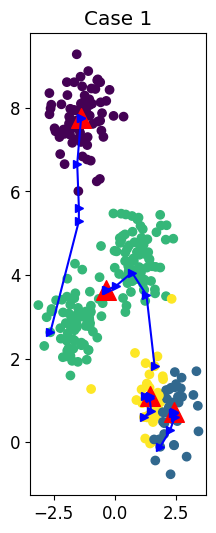

Centers found by K-means case 2: 
 [[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


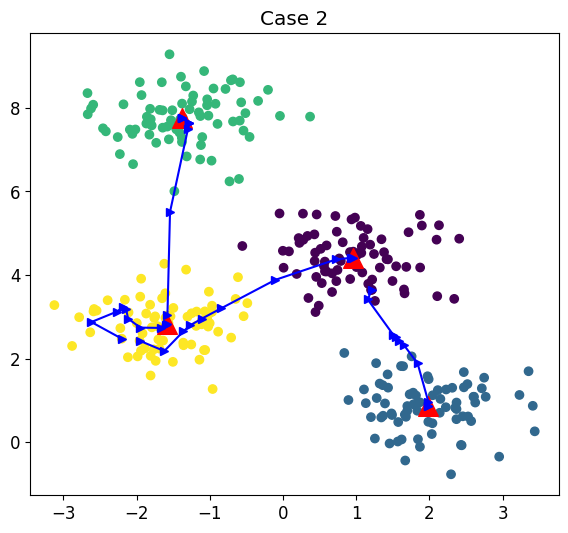

In [189]:
def plot_kmeans(data, labels, centroids, centroids_hist=None):
    plt.rcParams['figure.figsize'] = 15, 6
    plt.rcParams['font.size'] = 12
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='^', s=200)
    if centroids_hist is not None:
        for i in range(len(centroids)):
            plt.plot(centroids_hist[:, i, 0], centroids_hist[:, i, 1], c='b', marker=">")

# Parameter configuration
num_clusters = 4
num_iterations = 100
data = X

# Run 2 cases with different initial centroids
for i in range(1, 3):
    # Apply K-means algorithm to the dataset
    labels, centers, centers_hist = kmeans(data, num_clusters, num_iterations)
    print('Centers found by K-means case {0}: \n'.format(i), centers)
    # Plot the clustered dataset
    plt.subplot(1, 2, i)
    plt.title('Case {0}'.format(i))
    plot_kmeans(data, labels, centers, centers_hist)
    plt.show()

# Comment:
* K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. Hence, the minimized object the within-cluster sum of squares (WCSS) is to find:
$$
\arg \min_S \sum_{i=1}^{k} \sum_{x \in S_i} || \boldsymbol{x} - \boldsymbol{\mu_i} ||^2
$$

* The algorithm works iteratively to assign each data point to one of K groups based on the features input and initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. Then the k-means will converge after finite iterations since there are only a finite number of cluster assignments. 

* We assume that the number of clusters in the given dataset is 4. The above two diagrams are respective to two different initial centroids. As we can see, the performance heavily depends on centroids initialization. Choosing the poor random initial centroids will take longer to converge or get stuck on local optima which may result in bad clustering - refer to the above diagrams. 

* The k-means method using the scikit-learn library usually perform fairly good in various cases and it can help to verify the implemented algorithm correctness.

<div class="alert alert-block alert-info">
<strong>Question 2.</strong> Use the built-in k-means implementation in sklearn and determine centroids and clusters.

Follow the guidelines below:

<ul>
    <li> Use the KMeans algorithm from sklearn</li>
    <li> Use the fit_predict method to cluster data</li>
    <li> Use the cluster_centers_ method to retrieve centroids</li>
</ul>

The output of your cell should contain the following information:
<ul>
    <li> Plot the clustered data points, using the same code your have produced for Question.1</li>
    <ul>
        <li>Using different colors for each cluster</li>
        <li>Plot the centroid positions for each cluster</li>
    </ul>
</ul>
</div>

Centers found by scikit-learn:
 [[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


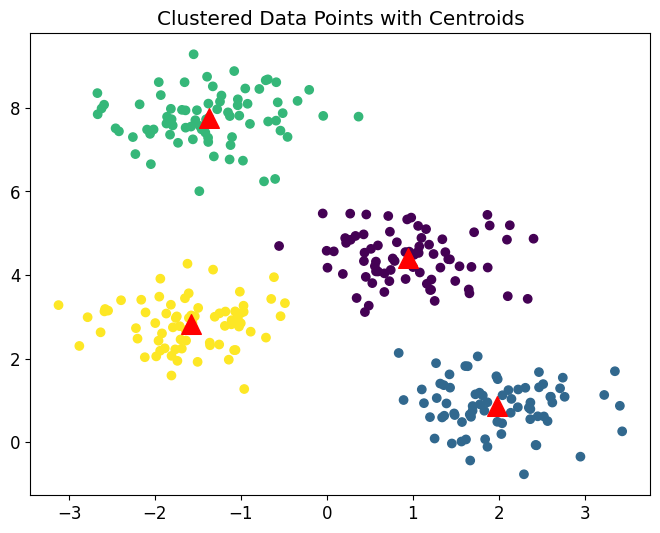

In [190]:
# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

def plot_kmeans(data, labels, centroids):
    plt.rcParams['figure.figsize'] = 8, 6
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='^', s=200)
    plt.title('Clustered Data Points with Centroids')
    plt.show()

# TODO 6: implement K-means algorithm using sklearn 
skl_kmeans = KMeans(n_clusters=4, random_state=0)
skl_labels = skl_kmeans.fit_predict(X)
skl_centers = skl_kmeans.cluster_centers_
print('Centers found by scikit-learn:\n', skl_centers)
plot_kmeans(data, skl_labels, skl_centers)

<div class="alert alert-block alert-info">
<strong>Question 3.</strong> Use the sklearn dataset API to generate alternative synthetic data to test your k-means algorithm implementation.

Follow the guidelines from this document: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py


The output of your cell should contain the following information:
<ul>
    <li> Plot the new synthetic dataset you generated
    <li> Plot the clustered data points, using the same code your have produced for Question.1</li>
    <ul>
        <li>Using different colors for each cluster</li>
        <li>Plot the centroid positions for each cluster</li>
    </ul>
</ul>
</div>

Centers found by scikit-learn:
 [[ 0.30555112  0.35498665]
 [-0.31661264 -0.37197152]]


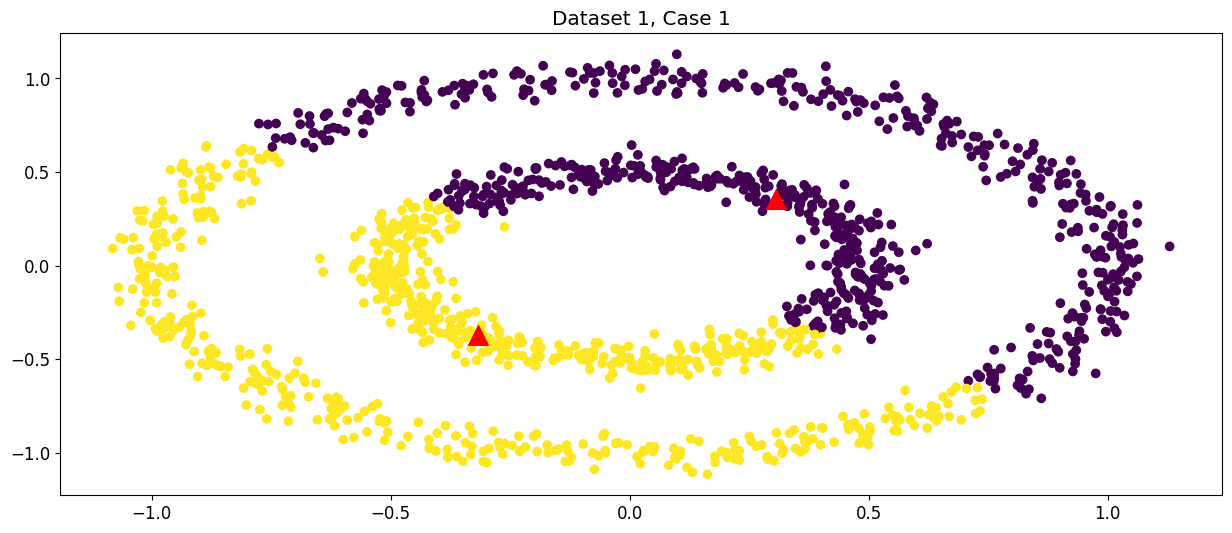

Centers found by scikit-learn:
 [[ 0.30555112  0.35498665]
 [-0.31661264 -0.37197152]]


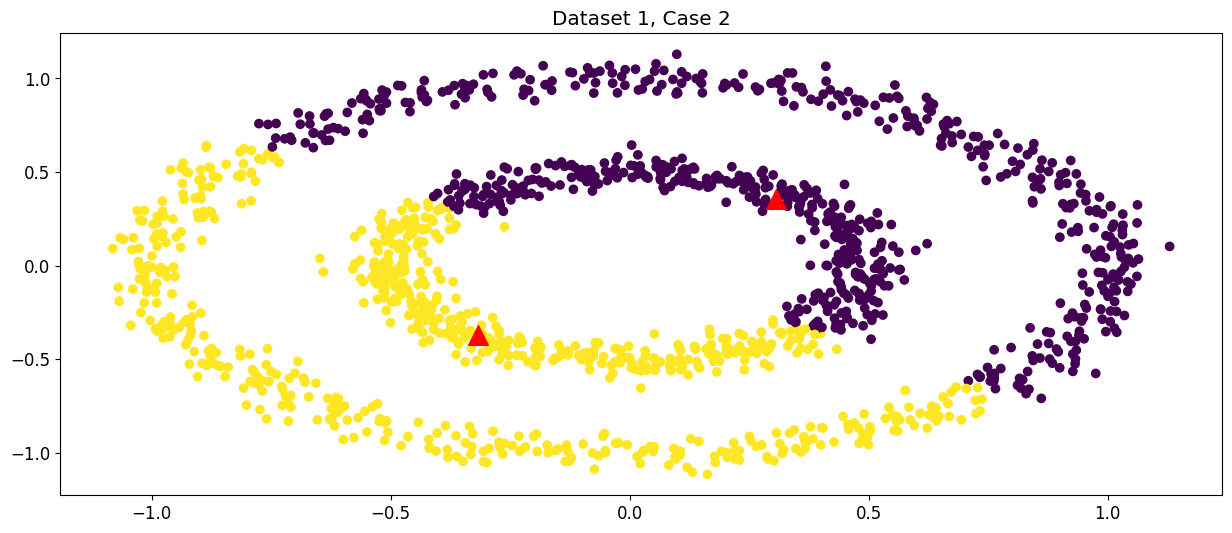

Centers found by scikit-learn:
 [[ 1.21584409 -0.08100894]
 [-0.19562067  0.5754955 ]]


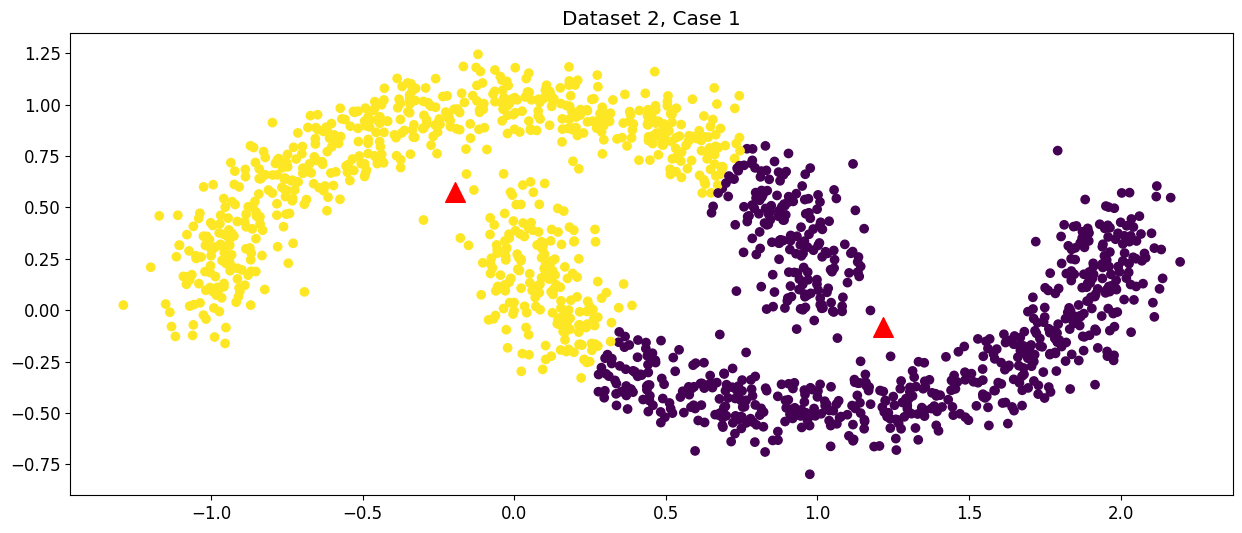

Centers found by scikit-learn:
 [[ 1.21584409 -0.08100894]
 [-0.19562067  0.5754955 ]]


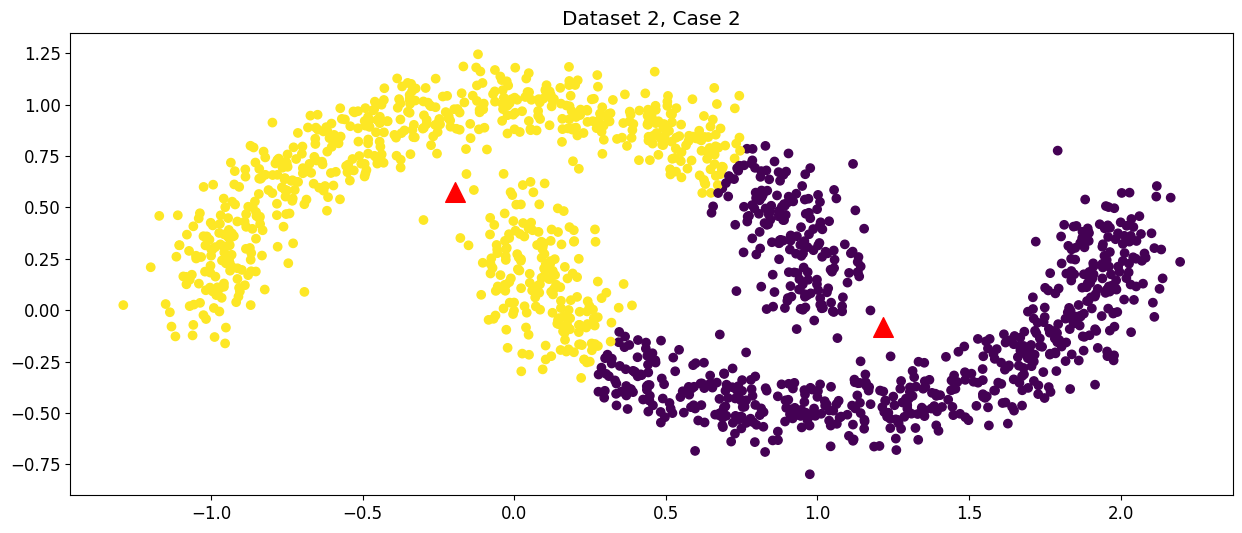

Centers found by scikit-learn:
 [[-5.31738211 -9.81080765]
 [ 7.4465051   5.05431028]]


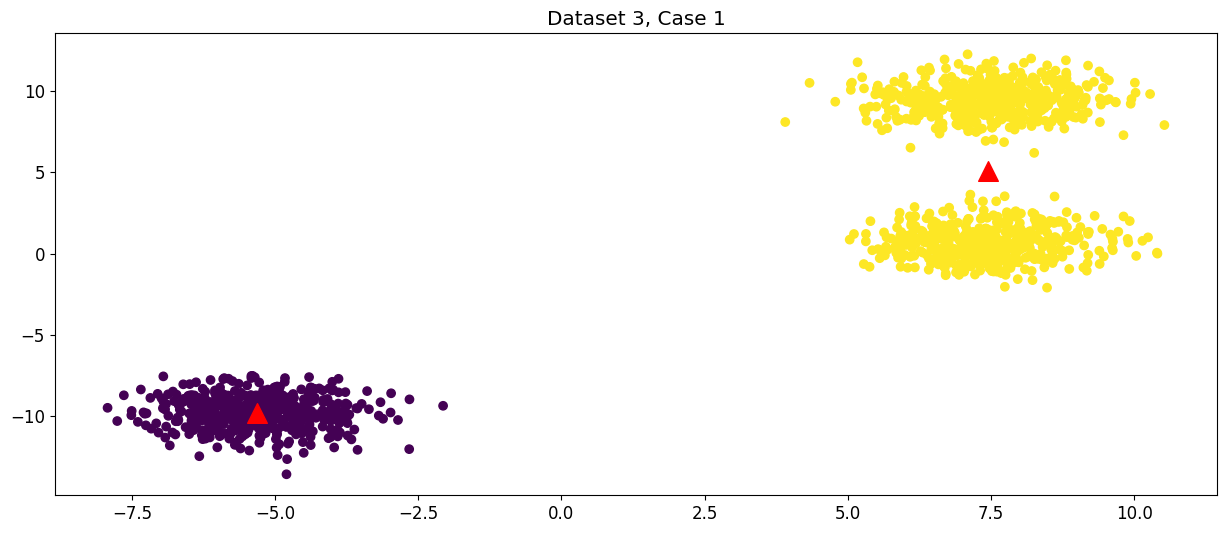

Centers found by scikit-learn:
 [[-5.31738211 -9.81080765]
 [ 7.4465051   5.05431028]]


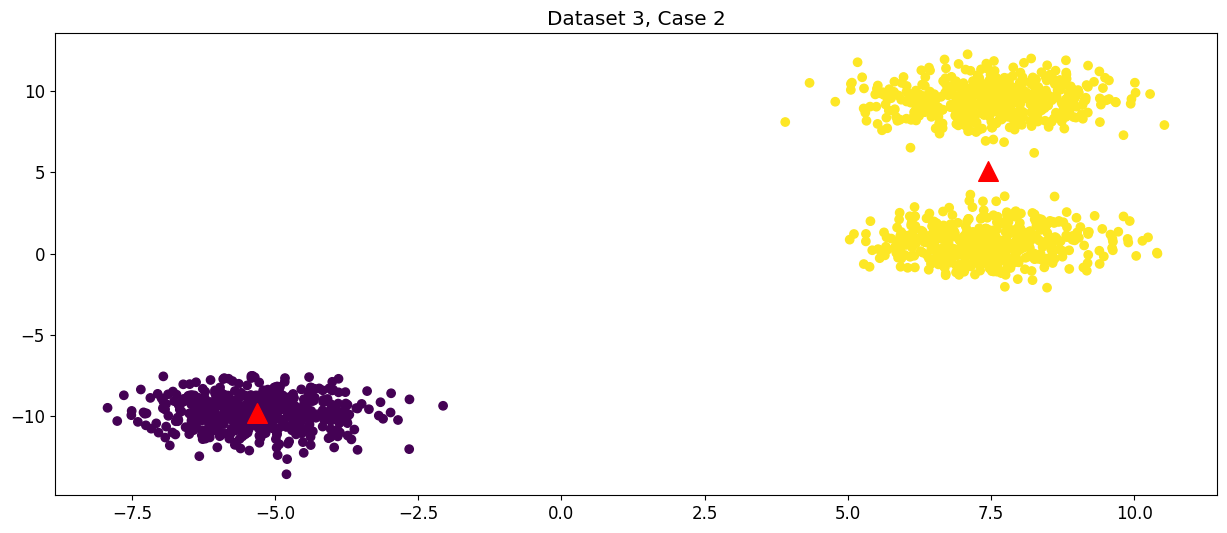

Centers found by scikit-learn:
 [[ 0.059788    0.55226548]
 [-8.22539031 -4.22291197]]


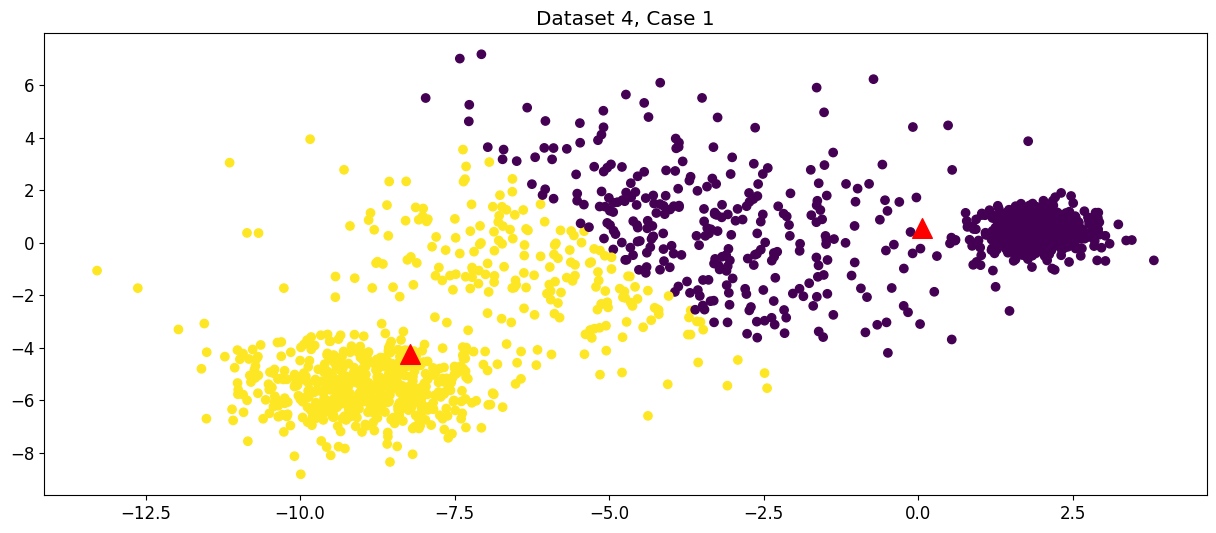

Centers found by scikit-learn:
 [[ 0.059788    0.55226548]
 [-8.22539031 -4.22291197]]


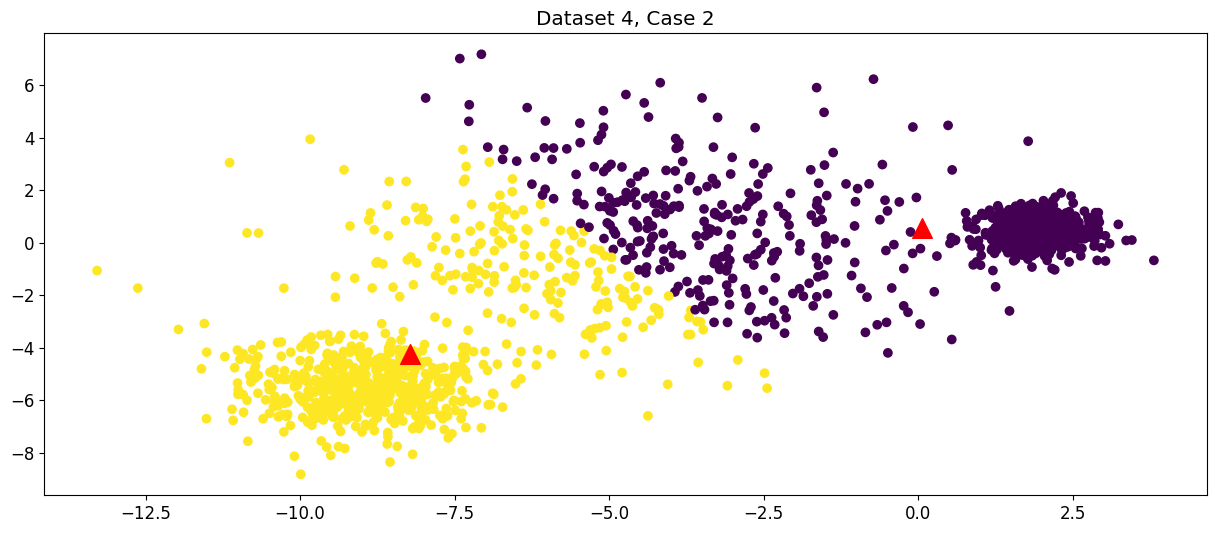

In [191]:
from sklearn import datasets
n_samples = 1500

# TODO 7: generate different synthetic datasets

def plot_kmeans(data, labels, centroids, centroids_hist=None):
    plt.rcParams['figure.figsize'] = 15, 6
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='^', s=200)
    if centroids_hist is not None:
        for i in range(len(centroids)):
            plt.plot(centroids_hist[:, i, 0], centroids_hist[:, i, 1], c='b', marker=">")

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05), {'n_clusters': 2}),
    (datasets.make_moons(n_samples=n_samples, noise=0.1), {'n_clusters': 2}),
    (datasets.make_blobs(n_samples=n_samples, random_state=8), {'n_clusters': 3}),
    (datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170), {'n_clusters': 3})
]

for i, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    # Parameter configuration
    X, y = dataset
    Nb_cluster =  2
    numIterations = 100
    data = X

    # Run 2 cases with different initial centroids
    for j in range(1,3):
        # TODO 8: apply Kmeans alogorithm onto given dataset 
        # Apply K-means algorithm to the given dataset
        skl_kmeans = KMeans(n_clusters=Nb_cluster, random_state=0)
        skl_labels = skl_kmeans.fit_predict(X)
        skl_centers = skl_kmeans.cluster_centers_
        print('Centers found by sci   kit-learn:\n', skl_centers)
        plot_kmeans(data, skl_labels, skl_centers)
        plt.title(f'Dataset {i+1}, Case {j}')
        plt.show()

# Comment:
* The k-means algorithm has proved the high performance with linear separable dataset (since 2 clusters can be seperated by their perpendicular bisector). However, with the synthetic datasets, the k-means method does not perform well due to the random seeding will inevitably merge clusters together, and the algorithm will never be able to split them apart.

* According to our examples (moon and circle shape ...) - the above four diagrams,  it always separates the dataset into 2 identical regions, despite trying with different initials centroids, while we expect it to identify two separate circles or moons. 

* In order to cope with nonlinear separability samples, we can try other statistical approaches such as DBSCAN.

***